In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. More about that later. 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
from pylab import *
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [5]:
distributed_systems = ['cassandra', 'hdfs', 'tensorflow', 'hbase']
custom_distributed_systems_name = ['Cassandra', 'HDFS (Datanodes)', 'Tensorflow (Tasks)', 'HBase (RegionServers)']

In [6]:
df = pd.read_csv('./data.csv')
df = df.set_index('nodes')

In [7]:
df.head()

,cassandra,hdfs,tensorflow,hbase
nodes,,,,
10,10,20,1200,30
20,34,41,2500,61
30,54,61,3700,89
40,74,84,4900,127
50,96,104,6100,151


In [8]:
df.index

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='int64', name='nodes')

Text(0, 0.5, 'Memory (MB)')

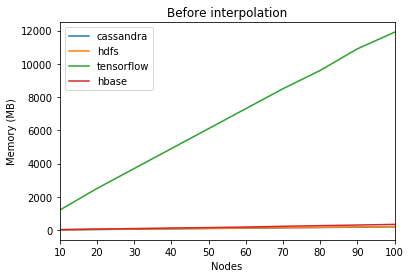

In [9]:
ax = df.plot.line()
ax.set_title('Before interpolation')
ax.set_xlabel("Nodes")
ax.set_ylabel("Memory (MB)")

In [10]:
# f = interp1d(df.index, df['memory'], kind='cubic')
f = []
for system in distributed_systems:
    f.append(interp1d(df.index, df[system], kind='cubic'))

In [11]:
df_int = pd.DataFrame()
new_index = np.arange(10, 110, 10)
# df_int['memory'] = f(new_index)

for i in range(len(distributed_systems)):
    df_int[custom_distributed_systems_name[i]] = f[i](new_index) 
    
df_int.index = new_index


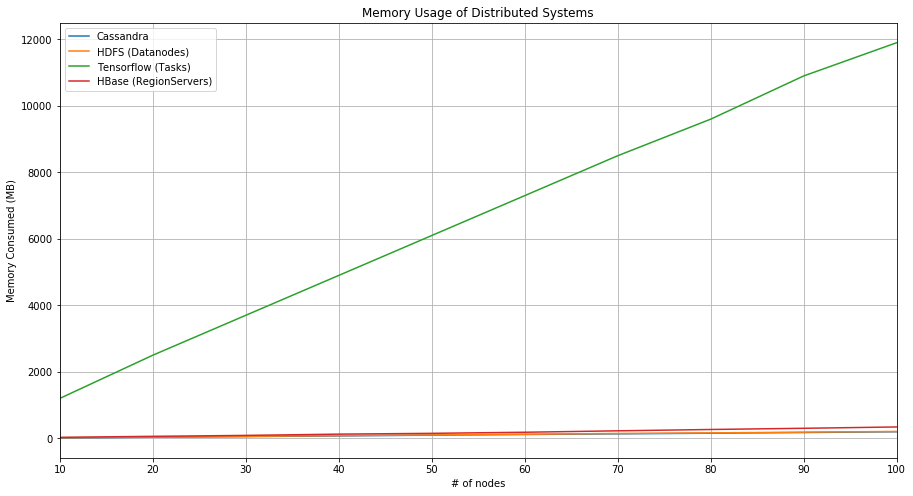

In [12]:
ax2 = df_int.plot.line(figsize=(15,8), grid=True)
ax2.set_title('Memory Usage of Distributed Systems')
ax2.set_xlabel("# of nodes")
ax2.set_ylabel("Memory Consumed (MB)")
# ax2.set_yticks(np.arange(0, 12000, 100))
# ax2.set_ylim(bottom=0)
# ax2.
plt.savefig('plot.png')

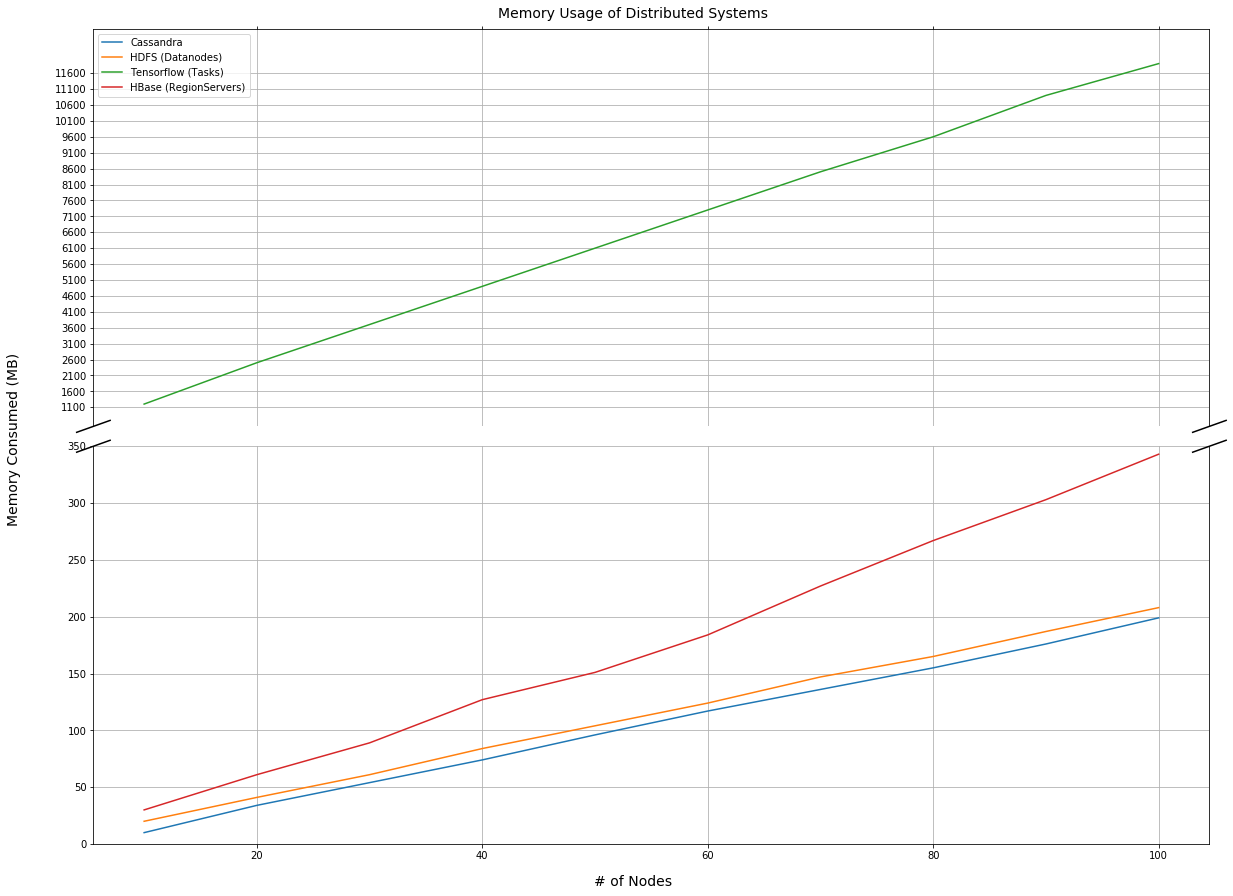

In [17]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

axes = []
for system in custom_distributed_systems_name: 
    ax.plot(df_int.index, df_int[system], label=system)
    axes.append(ax)
    ax2.plot(df_int.index, df_int[system], label=system)

    
ax.set_ylim(500, 13000)
ax2.set_ylim(0, 350)

fig.suptitle('Memory Usage of Distributed Systems', y=0.9, fontsize=14)
fig.text(0.5, 0.09, '# of Nodes', ha='center', va='center', fontsize=14)
fig.text(0.07, 0.5, 'Memory Consumed (MB)', ha='center', va='center', rotation='vertical', fontsize=14)

fig.subplots_adjust(hspace=0.05)

ax.set_yticks(np.arange(1100, 12000, 500))

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# fig.legend(axes,
#            labels=custom_distributed_systems_name,
# #            bbox_to_anchor=(0.5, 0.5), 
#            loc="best",
#            borderaxespad=0.1,
#            title="Legend")

ax.legend(loc="best")
#            bbox_to_anchor=(0.5, -0.1), 
#            loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
#            title="Legend Title")  # Title for the legend)

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.grid(True)
ax2.grid(True)

fig.savefig('plot.png')

# for system in custom_distributed_systems_name: 
#     ax2.plot(df_int.index, df_int[system])

# ax2.plot(df_int.index, df_int['HDFS (Datanodes)'])
# ax.plot(df_int['Cassandra'])
# ax2.plot(df_int['Cassandra'])